In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats,special
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import AdaBoostRegressor

from xgboost import XGBRegressor

import lightgbm as lgb

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam

from sklearn.cluster import KMeans, MeanShift, DBSCAN, Birch

In [2]:
#data_path = '/content/gdrive/My Drive/351_Project/data.csv'
df = pd.read_csv("../input/datata/data.csv")

In [3]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [4]:
df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,174389.000000,174389.000000,1.743890e+05,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000
mean,0.499228,0.536758,2.328100e+05,0.482721,0.068135,0.197252,5.205305,0.211123,-11.750865,0.702384,25.693381,0.105729,117.006500,0.524533,1977.061764
std,0.379936,0.176025,1.483958e+05,0.272685,0.251978,0.334574,3.518292,0.180493,5.691591,0.457211,21.872740,0.182260,30.254178,0.264477,26.907950
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.087700,0.414000,1.661330e+05,0.249000,0.000000,0.000000,2.000000,0.099200,-14.908000,0.000000,1.000000,0.035200,93.931000,0.311000,1955.000000
50%,0.517000,0.548000,2.057870e+05,0.465000,0.000000,0.000524,5.000000,0.138000,-10.836000,1.000000,25.000000,0.045500,115.816000,0.536000,1977.000000
75%,0.895000,0.669000,2.657200e+05,0.711000,0.000000,0.252000,8.000000,0.270000,-7.499000,1.000000,42.000000,0.076300,135.011000,0.743000,1999.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


In [5]:
num_cols = df.columns[df.dtypes != 'object']
df_norm = df

scaler = MinMaxScaler()
df_norm[num_cols] = scaler.fit_transform(df_norm[num_cols])

In [6]:
df = df_norm
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.994980,['Mamie Smith'],0.605263,0.030637,0.224,0.0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,0.454545,0.3790,0.741868,0.0,Keep A Song In Your Soul,0.12,1920,0.096395,0.615900,0.6340,0.0
1,0.645582,"[""Screamin' Jay Hawkins""]",0.862348,0.027237,0.517,0.0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,0.454545,0.0809,0.825918,0.0,I Put A Spell On You,0.07,1920-01-05,0.054995,0.356823,0.9500,0.0
2,0.996988,['Mamie Smith'],0.654858,0.029792,0.186,0.0,11m7laMUgmOKqI3oYzuhne,0.000018,0.000000,0.5190,0.750168,1.0,Golfing Papa,0.04,1920,0.179197,0.400810,0.6890,0.0
3,0.000174,['Oscar Velazquez'],0.738866,0.078215,0.798,0.0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,0.181818,0.1280,0.825135,1.0,True House Music - Xavier Santos & Carlos Gomi...,0.17,1920-01-01,0.043769,0.525640,0.0422,0.0
4,0.296185,['Mixe'],0.712551,0.030054,0.707,1.0,2hJjbsLCytGsnAHfdsLejp,0.000246,0.909091,0.4020,0.845102,0.0,Xuniverxe,0.02,1920-10-01,0.079094,0.501324,0.2990,0.0


DATA SELECTION

In [7]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.994980,['Mamie Smith'],0.605263,0.030637,0.224,0.0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,0.454545,0.3790,0.741868,0.0,Keep A Song In Your Soul,0.12,1920,0.096395,0.615900,0.6340,0.0
1,0.645582,"[""Screamin' Jay Hawkins""]",0.862348,0.027237,0.517,0.0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,0.454545,0.0809,0.825918,0.0,I Put A Spell On You,0.07,1920-01-05,0.054995,0.356823,0.9500,0.0
2,0.996988,['Mamie Smith'],0.654858,0.029792,0.186,0.0,11m7laMUgmOKqI3oYzuhne,0.000018,0.000000,0.5190,0.750168,1.0,Golfing Papa,0.04,1920,0.179197,0.400810,0.6890,0.0
3,0.000174,['Oscar Velazquez'],0.738866,0.078215,0.798,0.0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,0.181818,0.1280,0.825135,1.0,True House Music - Xavier Santos & Carlos Gomi...,0.17,1920-01-01,0.043769,0.525640,0.0422,0.0
4,0.296185,['Mixe'],0.712551,0.030054,0.707,1.0,2hJjbsLCytGsnAHfdsLejp,0.000246,0.909091,0.4020,0.845102,0.0,Xuniverxe,0.02,1920-10-01,0.079094,0.501324,0.2990,0.0


In [8]:
#x=df.iloc[1:10000,[9,13]].values
#x=df.iloc[1:10000,[10,13,16,9,2]].values
x=df.iloc[1:10000,[0,13,2,4,7,9,10,15,16,17]].values

# 13 = popularity (target)
# 10 = loudness
# 15 should be speechiness
# 9 is liveness

x.shape

(9999, 10)

In [9]:
x

array([[6.45582329e-01, 7.00000000e-02, 8.62348178e-01, ...,
        5.49948507e-02, 3.56823418e-01, 9.50000000e-01],
       [9.96987952e-01, 4.00000000e-02, 6.54858300e-01, ...,
        1.79196704e-01, 4.00809833e-01, 6.89000000e-01],
       [1.73694779e-04, 1.70000000e-01, 7.38866397e-01, ...,
        4.37693100e-02, 5.25639920e-01, 4.22000000e-02],
       ...,
       [1.56626506e-01, 4.80000000e-01, 5.88056680e-01, ...,
        3.45005149e-02, 3.18249578e-01, 8.70000000e-01],
       [5.30120482e-01, 5.70000000e-01, 6.54858300e-01, ...,
        3.74871267e-02, 3.77159589e-01, 8.18000000e-01],
       [4.65863454e-01, 5.30000000e-01, 4.50404858e-01, ...,
        2.53347065e-02, 2.94155815e-01, 2.22000000e-01]])

In [10]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=1,min_samples=4,metric='euclidean')

In [11]:
model=db.fit(x)

In [12]:
label=model.labels_

In [13]:
label

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 1


In [15]:
y_db = db.fit_predict(x)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


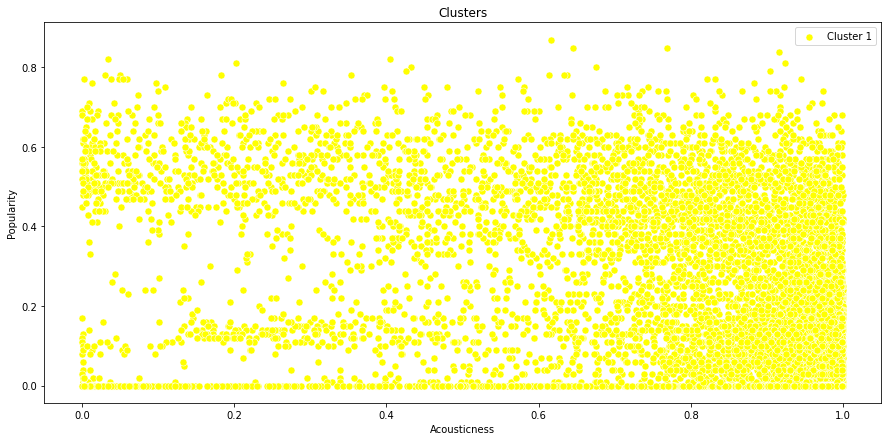

In [16]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(x[y_db == 0, 0], x[y_db == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x[y_db == 1, 0], x[y_db == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x[y_db == 2, 0], x[y_db == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(x[y_db == 3, 0], x[y_db == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(x[y_db == 4, 0], x[y_db == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
#sns.scatterplot(db.cluster_centers_[:, 0], db.cluster_centers_[:, 1], color = 'red', 
 #               label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters')
plt.xlabel('Acousticness')
plt.ylabel('Popularity')
plt.legend()
plt.show()

* It is apparent that DBSCAN is a dead end. K-means seemed somewhat successful in KNIME, so let's pursue that.



In [17]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


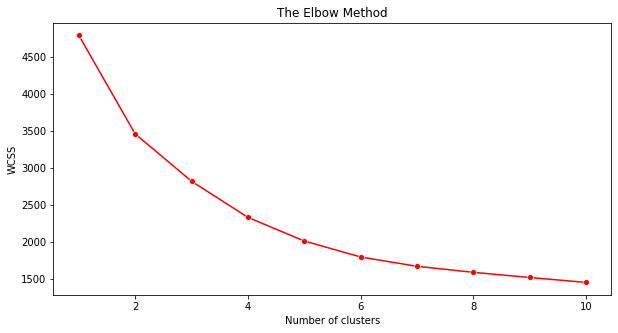

In [18]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-package

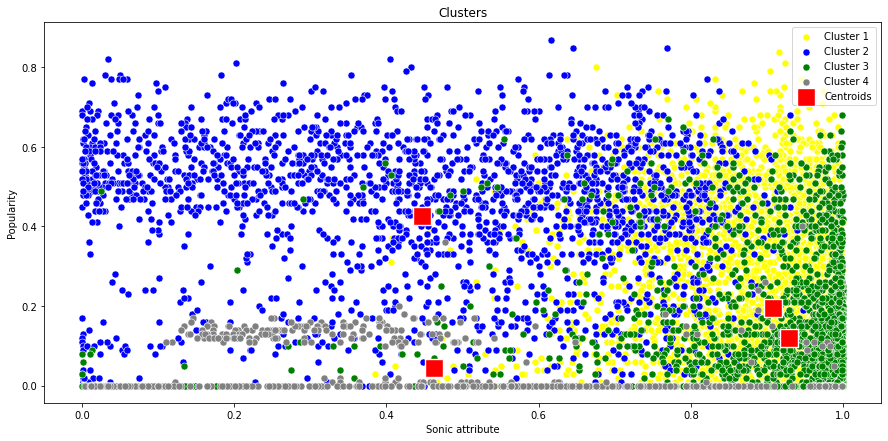

In [20]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters')
plt.xlabel('Sonic attribute')
plt.ylabel('Popularity')
plt.legend()
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-package

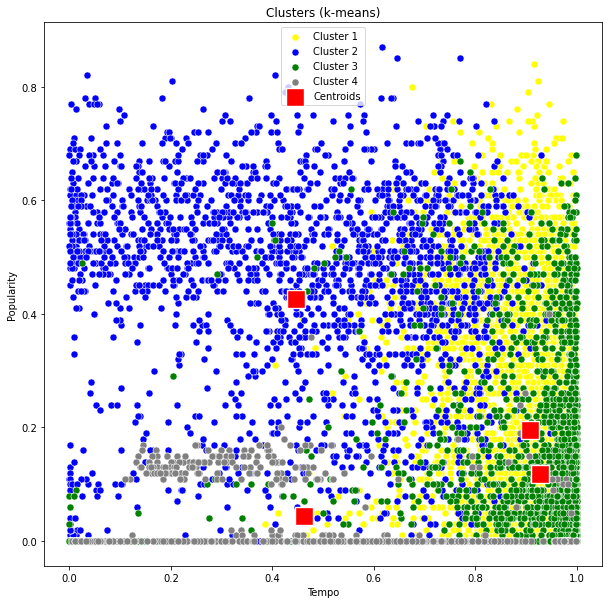

In [26]:
# Visualising the clusters - with respect to second indpendent varaiblwe
# b = ind var # examined
b=0

plt.figure(figsize=(10,10))
sns.scatterplot(x[y_kmeans == 0, b], x[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x[y_kmeans == 1, b], x[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x[y_kmeans == 2, b], x[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(x[y_kmeans == 3, b], x[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(x[y_kmeans == 4, b], x[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, b], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters (k-means)')
plt.xlabel('Tempo')                     #make sure this label is correct
plt.ylabel('Popularity')
plt.legend()
plt.show()

In [27]:
from sklearn.cluster import AgglomerativeClustering as agg
agglo = agg(n_clusters=4, linkage='ward', 
                               )
y_agglo = agglo.fit_predict(x)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-package

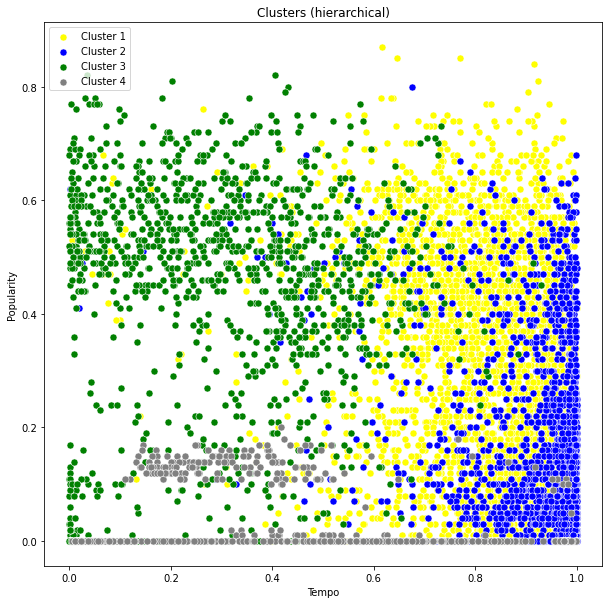

In [28]:
# Visualising the clusters
#b=8
plt.figure(figsize=(10,10))
sns.scatterplot(x[y_agglo == 0, b], x[y_agglo == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x[y_agglo == 1, b], x[y_agglo == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x[y_agglo == 2, b], x[y_agglo == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(x[y_agglo == 3, b], x[y_agglo == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(x[y_agglo == 4, b], x[y_agglo == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
#sns.scatterplot(agglo.cluster_centers_[:, b], agglo.cluster_centers_[:, 1], color = 'red', 
#                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters (hierarchical)')
plt.xlabel('Tempo')
plt.ylabel('Popularity')
plt.legend()
plt.show()